In [20]:
%matplotlib notebook
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
import scipy.constants as c
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as cons
from mcerp import N, umath, Gamma
from bdots import *
import pickle
import csv
import string
letters=list(string.ascii_lowercase)

class TS_fibre_data:
    def __init__(self, fn):
        shift=[]
        Background=[]
        Response=[]
        Shot=[]
        Fit=[]

        with open(fn, 'r',newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader)
            next(reader)
            for row in reader:
                shift.append(float(row[0]))
                Background.append(float(row[1]))
                Response.append(float(row[2]))
                Shot.append(float(row[3]))
                Fit.append(float(row[4]))

        self.shift=np.asarray(shift)
        self.Background=np.asarray(Background)
        self.Response=np.asarray(Response)
        self.Shot=np.asarray(Shot)
        self.Fit=np.asarray(Fit)

# Interferometry

In [73]:
%cd "~\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS"
rot=-90
s0612_15_532=NeLMap2('s0612_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s0612_15_532
s.set_origin(origin=(2430,1450), extent=[-11.5,11.5,-8,8])

%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"
rot=-90
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s1006_15_532
s.set_origin(origin=(2305,1411), extent=[-11.5,11.5,-8,8])

rot=-90
s1006_15_355=NeLMap2('s1006_15 355nm neL itilt.txt', scale=128, rot_angle=rot, multiply_by=1/1.6, flip_lr=True)
s=s1006_15_355
s.set_origin(origin=(1618,1195), extent=[-11.5,11.5,-8,8])

%cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

s1026_15_532=NeLMap2('s1026_15 532nm neL.txt', scale=173, rot_angle=-90, multiply_by=1/1.6)
s1026_15_532.set_origin(origin=(2377,1438), extent=[-11.5,11.5,-8,8])
s=s1026_15_532

s1026_15_355=NeLMap2('s1026_15 355nm neL.txt', scale=128, multiply_by=2/1.6, rot_angle=-90, flip_lr=True)
s1026_15_355.set_origin(origin=(1540,1110), extent=[-11.5,11.5,-8,8])
s=s1026_15_355

%cd "~\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS"

s0429_16_532=NeLMap2('s0429_16 532nm neL.txt', scale=168, multiply_by=1/1.6, rot_angle=-90+22.5)
s=s0429_16_532
s.set_origin(origin=(2850,2348), extent=[-11.5,11.5,-8,8])

s0429_16_355=NeLMap2('s0429_16 355nm neL.txt', scale=168, multiply_by=1/1.6, rot_angle=-90+22.5, flip_lr=True)
s=s0429_16_355
s.set_origin(origin=(2711,2268), extent=[-11.5,11.5,-8,8])

%cd "~\Google Drive\MAGPIE\data\2016\s0830_16 Reconnection C Faraday"

s0830_16_532=NeLMap2('s0830_16 532nm neL.txt', scale=173, rot_angle=-90+1.3, multiply_by=1/1.6)
s=s0830_16_532
s.set_origin(origin=(2250,1554),extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS


..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow
C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns
C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS
C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0830_16 Reconnection C Faraday


<IPython.core.display.Javascript object>


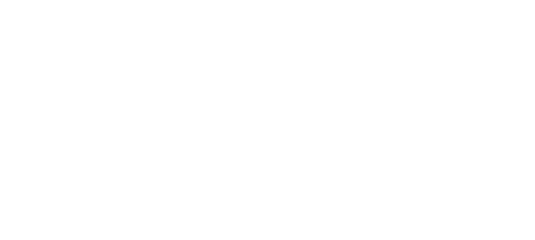

(3719, 865) (259, 865)
(3719, 1211) (259, 1211)
(832, 384) (832, 1664)
(2112, 384) (2112, 1664)


In [74]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig=plt.figure(figsize=(6.69,3))

grid = ImageGrid(fig, rect=(-0.01,0.2,0.7,0.75),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.1,
                 )
clim=[0,2]

s1006_15_532.plot_data_mm(ax=grid[0], clim=clim, multiply_by=1e-18)
bim=s1006_15_355.plot_data_mm(ax=grid[1], clim=clim, multiply_by=1e-18)

for x_mm in [-2.9,-1]:
    grid[0].plot([x_mm,x_mm],[-10,10], lw=2, ls='dashed')
grid[0].lines[0].set_color('c')
grid[0].lines[1].set_color('red')


for a in grid:
    a.set_ylim([-11.5,11.5])
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    
grid[0].set_ylabel('y (mm)', fontsize=10, labelpad=-4)

c=grid[1].cax.colorbar(bim, ticks=[0,1 ,2])
#grid[1].cax.toggle_label(True)
c.set_label_text(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10)
c.ax.tick_params(labelsize=10, pad=5, length=6, width=1)

#plt.subplots_adjust(bottom=0.2, left=0.1, top=0.95, right=0.99)


th=np.linspace(-360/32*3,360/32*3,4)
for t in th:
    c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    grid[0].add_artist(c)
    c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    grid[1].add_artist(c)
    c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    grid[0].add_artist(c)
    c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    grid[1].add_artist(c)

    
l=0.72   
h=0.3
w=0.25
b=0.2
ax3=fig.add_axes((l,b+h+0.15,w,h))
ax4=fig.add_axes((l,b,w,h))

x_mm=-3
s=s1006_15_532
s.create_lineout(start=(-10,x_mm),end=(10,x_mm), lineout_width=0.2*s.scale)
ax3.plot(s.mm, s.lo*1e-18, label="x= "+str(x_mm)+" mm", lw=2, c='c')  

x_mm=-1
s.create_lineout(start=(-10,x_mm),end=(10,x_mm), lineout_width=0.2*s.scale)
ax3.plot(s.mm, s.lo*1e-18, label="x= "+str(x_mm)+" mm", lw=2, c='red') 


ax3.set_xticks([-10,-5,0,5,10])
ax3.xaxis.set_minor_locator(MultipleLocator(5))

ax3.set_xlabel('y (mm)', fontsize=10)
ax3.set_xlim([-10,10])

#ax3.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10)
#ax3.legend(fontsize=10)

ax3.annotate('x=-3 mm',xy=(-7,0.5),xycoords='data',textcoords='data',xytext=(-9.7,1.6),
             arrowprops=dict(arrowstyle='->',fc='c',ec="c",lw=2),bbox=dict(fc="w", ec='w', pad=0),
            ha='left', va='bottom', fontsize=10)

ax3.annotate('x=-1 mm',xy=(4,0.3),xycoords='data',textcoords='data',xytext=(1.0,1.6),
             arrowprops=dict(arrowstyle='->',fc='r',ec="r",lw=2),bbox=dict(fc="w",ec='w', pad=0),
            ha='left', va='bottom', fontsize=10)
ys=[5,-5]
xs=[-4,4]


colors=['mediumspringgreen', 'violet']
for y_mm,col in zip(ys, colors):
    grid[1].plot(xs,[y_mm,y_mm], lw=2, ls='--', c=col)

multiply_by=1e-18
y_mm=ys[0]
s=s1006_15_355
s.create_lineout(start=(y_mm,-5),end=(y_mm,5), lineout_width=0.2*s.scale)
ax4.plot(s.mm, s.lo*multiply_by, label="y= "+str(y_mm)+" mm", lw=2, c=colors[0])  

y_mm=ys[1]
s.create_lineout(start=(y_mm,-5),end=(y_mm,5), lineout_width=0.2*s.scale)
ax4.plot(s.mm, s.lo*multiply_by, label="y= "+str(y_mm)+" mm", lw=2, c=colors[1])  

ax4.set_xlim([-4,4])
ax4.set_xticks([-4,-2,0,2,4])

ax4.set_xlabel('x (mm)', fontsize=10)

ax4.annotate('y=5 mm',xy=(-3,0.7),xycoords='data',textcoords='data',xytext=(-3.9,1.6),
             arrowprops=dict(arrowstyle='->',fc=colors[0],ec=colors[0],lw=2),bbox=dict(fc="w", ec='w', pad=0),
            ha='left', va='bottom', fontsize=10)

ax4.annotate('y=-5 mm',xy=(0.8,0.4),xycoords='data',textcoords='data',xytext=(0.4,1.6),
             arrowprops=dict(arrowstyle='->',fc=colors[1],ec=colors[1],lw=2),bbox=dict(fc="w",ec='w', pad=0),
            ha='left', va='bottom', fontsize=10)


for a in [ax3,ax4]:
    a.tick_params(which='minor', pad=5, length=3, width=1)
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    a.grid(which='major',linewidth=1)
    a.grid(which='minor', linewidth=1)
    a.set_axisbelow(True)
    a.set_ylim([0, 2])
    a.set_yticks([0, 1,2])
    a.yaxis.set_minor_locator(MultipleLocator(0.5))


grid[0].text(x=0.0, y=0.99, va='top',ha='left',s=r' a) 223 ns', color='white',fontsize=10,transform=grid[0].transAxes)
grid[1].text(x=1, y=0.0, va='bottom',ha='right',s=r's1006_15', color='white',fontsize=6,transform=grid[0].transAxes)

grid[1].text(x=0.0, y=0.99, va='top',ha='left',s=r' b) 243 ns', color='white',fontsize=10,transform=grid[1].transAxes)

ax3.text(x=-0.22, y=1.08, va='top',ha='left',s=r' c)', fontsize=10,transform=ax3.transAxes)
ax4.text(x=-0.22, y=1.08, va='top',ha='left',s=r' d)', fontsize=10,transform=ax4.transAxes)


In [7]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='ne_maps.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

## ne maps v2

In [6]:
%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"
rot=-90
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s1006_15_532
s.set_origin(origin=(2305,1411), extent=[-11.5,11.5,-8,8])

rot=-90
s1006_15_355=NeLMap2('s1006_15 355nm neL itilt.txt', scale=128, rot_angle=rot, multiply_by=1/1.6, flip_lr=True)
s=s1006_15_355
s.set_origin(origin=(1618,1195), extent=[-11.5,11.5,-8,8])

rot=-90
s1006_15_532_if=Interferogram('s1006_15 532nm end on interferometry levels.JPG', scale=173, rot_angle=rot)
s=s1006_15_532_if
s.set_origin(origin=(2305,1411), extent=[-11.5,11.5,-8,8])

rot=-90
s1006_15_355_if=Interferogram('s1006_15 355 nm end on interferometry levels.JPG', scale=128, rot_angle=rot, flip_lr=True)
s=s1006_15_355_if
s.set_origin(origin=(1618,1118), extent=[-11.5,11.5,-8,8])

%cd "~\Google Drive\MAGPIE\data\2016\s0830_16 Reconnection C Faraday"

s0830_16_532=NeLMap2('s0830_16 532nm neL.txt', scale=173, rot_angle=-90+1.3, multiply_by=1/1.6)
s=s0830_16_532
s.set_origin(origin=(2250,1554),extent=[-11.5,11.5,-8,8])

s0830_16_532_if=Interferogram('s0830_16 532nm interferometry (2).JPG', scale=173, rot_angle=-90+1.3)
s=s0830_16_532_if
s.set_origin(origin=(2250,1554),extent=[-11.5,11.5,-8,8])


C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0830_16 Reconnection C Faraday


In [7]:
s1006_15_355_if.set_origin(origin=(1618,1118), extent=[-11.5,11.5,-8,8])

..\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


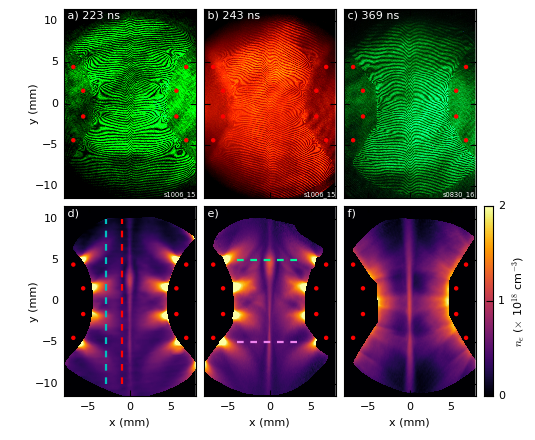

In [11]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig=plt.figure(figsize=(6.69,5.5))

grid = ImageGrid(fig, rect=(0.06,0.1,0.92,0.88),
                 nrows_ncols=(2,3),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="edge",
                 cbar_size="7%",
                 cbar_pad=0.1,
                 )

#Interferograms


grid[0].imshow(s1006_15_532_if.data_c, extent=s1006_15_532_if.extent, vmin=0, vmax=10)

#s1006_15_532_if.plot_data_mm(ax=grid[0])
s1006_15_355_if.plot_data_mm(ax=grid[1])
s0830_16_532_if.plot_data_mm(ax=grid[2])


#neL maps

clim=[0,2]

ys=[5,-5]
xs=[-4,4]


s1006_15_532.plot_data_mm(ax=grid[3], clim=clim, multiply_by=1e-18)
bim=s1006_15_355.plot_data_mm(ax=grid[4], clim=clim, multiply_by=1e-18)
s0830_16_532.plot_data_mm(ax=grid[5], clim=clim, multiply_by=1e-18)


for x_mm in [-2.9,-1]:
    grid[3].plot([x_mm,x_mm],[-10,10], lw=2, ls='dashed')
grid[3].lines[0].set_color('c')
grid[3].lines[1].set_color('red')

colors=['mediumspringgreen', 'violet']
for y_mm,col in zip(ys, colors):
    grid[4].plot(xs,[y_mm,y_mm], lw=2, ls='--', c=col)



for a in grid:
    a.set_ylim([-11.5,11.5])
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    
grid[3].set_ylabel('y (mm)', fontsize=10, labelpad=-4)
grid[0].set_ylabel('y (mm)', fontsize=10, labelpad=-4)


c=grid[5].cax.colorbar(bim, ticks=[0,1 ,2])
#grid[1].cax.toggle_label(True)
c.set_label_text(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10)
c.ax.tick_params(labelsize=10, pad=5, length=6, width=1)

#plt.subplots_adjust(bottom=0.2, left=0.1, top=0.95, right=0.99)

c=grid[2].cax
c.set_axis_off()


th=np.linspace(-360/32*3,360/32*3,4)
for t in th:
    for g in grid:
        c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
        g.add_artist(c)
        c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
        g.add_artist(c)
        
        
grid[0].text(x=0.0, y=0.99, va='top',ha='left',s=r' a) 223 ns', color='white',fontsize=10,transform=grid[0].transAxes)
grid[1].text(x=0.0, y=0.99, va='top',ha='left',s=r' b) 243 ns', color='white',fontsize=10,transform=grid[1].transAxes)
grid[2].text(x=0.0, y=0.99, va='top',ha='left',s=r' c) 369 ns', color='white',fontsize=10,transform=grid[2].transAxes)

grid[3].text(x=0.0, y=0.99, va='top',ha='left',s=r' d)', color='white',fontsize=10,transform=grid[3].transAxes)
grid[4].text(x=0.0, y=0.99, va='top',ha='left',s=r' e)', color='white',fontsize=10,transform=grid[4].transAxes)
grid[5].text(x=0.0, y=0.99, va='top',ha='left',s=r' f)', color='white',fontsize=10,transform=grid[5].transAxes)

grid[0].text(x=1, y=0.0, va='bottom',ha='right',s=r's1006_15', color='white',fontsize=6,transform=grid[0].transAxes)
grid[1].text(x=1, y=0.0, va='bottom',ha='right',s=r's1006_15', color='white',fontsize=6,transform=grid[1].transAxes)
grid[2].text(x=1, y=0.0, va='bottom',ha='right',s=r's0830_16', color='white',fontsize=6,transform=grid[2].transAxes)


In [12]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='ne_maps.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

# Lineouts

<IPython.core.display.Javascript object>


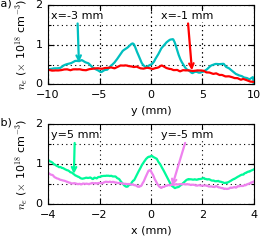

(3719, 865) (259, 865)
(3719, 1211) (259, 1211)
(832, 384) (832, 1664)
(2112, 384) (2112, 1664)


In [132]:
fig, ax=plt.subplots(2,1, figsize=(3.34, 3), sharey=True)    

ax3=ax[0]
ax4=ax[1]

x_mm=-3
s=s1006_15_532
s.create_lineout(start=(-10,x_mm),end=(10,x_mm), lineout_width=0.2*s.scale)
ax3.plot(s.mm, s.lo*1e-18, label="x= "+str(x_mm)+" mm", lw=2, c='c')  

x_mm=-1
s.create_lineout(start=(-10,x_mm),end=(10,x_mm), lineout_width=0.2*s.scale)
ax3.plot(s.mm, s.lo*1e-18, label="x= "+str(x_mm)+" mm", lw=2, c='red') 


ax3.set_xticks([-10,-5,0,5,10])
ax3.xaxis.set_minor_locator(MultipleLocator(5))

ax3.set_xlabel('y (mm)', fontsize=10)
ax3.set_xlim([-10,10])

#ax3.legend(fontsize=10)

ax3.annotate('x=-3 mm',xy=(-7,0.5),xycoords='data',textcoords='data',xytext=(-9.7,1.6),
             arrowprops=dict(arrowstyle='->',fc='c',ec="c",lw=2),bbox=dict(fc="w", ec='w', pad=0),
            ha='left', va='bottom', fontsize=10)

ax3.annotate('x=-1 mm',xy=(4,0.3),xycoords='data',textcoords='data',xytext=(1.0,1.6),
             arrowprops=dict(arrowstyle='->',fc='r',ec="r",lw=2),bbox=dict(fc="w",ec='w', pad=0),
            ha='left', va='bottom', fontsize=10)
ys=[5,-5]
xs=[-4,4]

multiply_by=1e-18
y_mm=ys[0]
s=s1006_15_355
s.create_lineout(start=(y_mm,-5),end=(y_mm,5), lineout_width=0.2*s.scale)
ax4.plot(s.mm, s.lo*multiply_by, label="y= "+str(y_mm)+" mm", lw=2, c=colors[0])  

y_mm=ys[1]
s.create_lineout(start=(y_mm,-5),end=(y_mm,5), lineout_width=0.2*s.scale)
ax4.plot(s.mm, s.lo*multiply_by, label="y= "+str(y_mm)+" mm", lw=2, c=colors[1])  

ax4.set_xlim([-4,4])
ax4.set_xticks([-4,-2,0,2,4])

ax4.set_xlabel('x (mm)', fontsize=10)

ax4.annotate('y=5 mm',xy=(-3,0.7),xycoords='data',textcoords='data',xytext=(-3.9,1.6),
             arrowprops=dict(arrowstyle='->',fc=colors[0],ec=colors[0],lw=2),bbox=dict(fc="w", ec='w', pad=0),
            ha='left', va='bottom', fontsize=10)

ax4.annotate('y=-5 mm',xy=(0.8,0.4),xycoords='data',textcoords='data',xytext=(0.4,1.6),
             arrowprops=dict(arrowstyle='->',fc=colors[1],ec=colors[1],lw=2),bbox=dict(fc="w",ec='w', pad=0),
            ha='left', va='bottom', fontsize=10)


for a in ax:
    a.tick_params(which='minor', pad=5, length=3, width=1)
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    a.grid(which='major',linewidth=1)
    a.grid(which='minor', linewidth=1)
    a.set_axisbelow(True)
    a.set_ylim([0, 2])
    a.set_yticks([0, 1,2])
    a.yaxis.set_minor_locator(MultipleLocator(0.5))
    a.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10)

ax3.text(x=-0.25, y=1.08, va='top',ha='left',s=r' a)', fontsize=10,transform=ax3.transAxes)
ax4.text(x=-0.25, y=1.08, va='top',ha='left',s=r' b)', fontsize=10,transform=ax4.transAxes)

plt.subplots_adjust(bottom=0.15, left=0.18, hspace=0.5, top=0.98, right=0.95)


In [133]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='ne_lineouts.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

## n_e profiles

In [97]:
shots=[s0612_15_532, s1006_15_532, s1006_15_355, s1026_15_532, s1026_15_355, s0429_16_532, s0429_16_355, s0830_16_532]
t=[192,223,243,272,292,327,347,369]

n_e0=[]
for ss in shots:
    ss.create_lineout(start=(0.1,0),end=(-0.1,0), lineout_width=ss.scale*0.1)
    n_e0.append(ss.lo.mean())
    
d_i=[2.28e8/6*(12/(n_e/6))**0.5 for n_e in n_e0] #d_i in mm
    
    
lo_x=[]
mm_x=[]
for ss in shots:
    ss.create_lineout(start=(0,-1),end=(0,1), lineout_width=ss.scale*0.1)
    lo_x.append(ss.lo)
    mm_x.append(ss.mm)

(1972, 1384) (2006, 1384)
(1972, 1384) (2006, 1384)
(1459, 1024) (1484, 1024)
(1972, 1384) (2006, 1384)
(1459, 1024) (1484, 1024)
(1915, 1344) (1948, 1344)
(1915, 1344) (1948, 1344)
(1972, 1384) (2006, 1384)
(1989, 1211) (1989, 1557)
(1989, 1211) (1989, 1557)
(1472, 896) (1472, 1152)
(1989, 1211) (1989, 1557)
(1472, 896) (1472, 1152)
(1932, 1176) (1932, 1512)
(1932, 1176) (1932, 1512)
(1989, 1211) (1989, 1557)


<IPython.core.display.Javascript object>


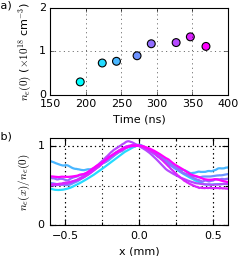

In [98]:
start = 0.0
stop = 1.0
number_of_lines= len(lo_x)
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [ cm.cool(x) for x in cm_subsection ]


fig, axes =plt.subplots(2,1,figsize=(3,3.2))

ax=axes[0]
ax.scatter(t, np.array(n_e0)/1e18, s=50, c=colors)
ax.set_ylim([0,2])
ax.set_yticks([0,1,2])
ax.tick_params(labelsize=10)
ax.set_xlabel('Time (ns)', fontsize=10)
ax.set_ylabel(r'$n_e(0)$ ($\times 10^{18}$ cm$^{-3}$)', fontsize=10)
ax.grid(True)

ax4=axes[1]

from matplotlib import cm


for l, mm, n0,c in zip(lo_x[1:], mm_x[1:], n_e0[1:], colors[1:]):
    ax4.plot(mm, l/n0, c=c,lw=2)

ax4.set_xlabel('x (mm)', fontsize=10)
ax4.set_ylabel(r'$n_e(x)/n_e(0)$',fontsize=10)
ax4.set_xlim([-0.6,0.6])
ax4.set_ylim([0,1.1])
ax4.set_xticks([-0.5,0,0.5])
ax4.set_yticks([0,1])

ax4.xaxis.set_minor_locator(MultipleLocator(0.25))
ax4.yaxis.set_minor_locator(MultipleLocator(0.5))


for a in [ax3,ax4]:
    a.tick_params(which='minor', pad=5, length=3, width=1)
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    a.grid(which='major',linewidth=1)
    a.grid(which='minor', linewidth=1)
    a.set_axisbelow(True)

plt.subplots_adjust(bottom=0.12, left=0.21, hspace=0.5, top=0.97, right=0.95)


ax.text(x=-0.3, y=1.08, va='top',ha='left',s=r' a)', fontsize=10,transform=ax.transAxes)
ax4.text(x=-0.3, y=1.08, va='top',ha='left',s=r' b)', fontsize=10,transform=ax4.transAxes)

#sp=0.05
#ofs=0.05
#for i, di in enumerate(d_i):
#    ax4.plot([-di, di], [0.5,0.5], c=colors[i], lw=2, solid_capstyle='round')
    
#ax4.text(x=0, y=0.45, va='bottom',ha='center',s=r'$2d_i$', fontsize=12, bbox=dict(fc="w",ec='w', pad=0))


In [99]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='ne_time_evolution.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

# Thomson

In [11]:
%cd "~\Google Drive\MAGPIE\data\2015\s0611_15\s0611_15 TS t240ns\shot"
ts=np.loadtxt('s0611_15 shot (corrupted line removed).asc')
ts=np.rot90(ts)
roi=np.flipud(ts[:270,980:1056])

%cd "~\Google Drive\MAGPIE\data\2015\s0611_15\s0611_15 TS t240ns"
A1=TS_fibre_data("s0611_15_1A_data_and_fit.dat")
A8=TS_fibre_data("s0611_15_8A_data_and_fit.dat")

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0611_15\s0611_15 TS t240ns\shot
C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0611_15\s0611_15 TS t240ns


In [12]:
fig=plt.figure(figsize=(4.1,2.55))

b=0.19

ax1=fig.add_axes([0.05, b, 0.2, 0.8])#l,b,w,h
ax1.imshow(roi, clim=[620,800], cmap=cmaps.viridis, interpolation='none')
ax1.plot([38,38],[0,270], lw=2, color='red', ls='--')
ax1.set_ylim([0,270])
ax1.axis('off')
ax1.text(x=38, y=0, va='top',ha='center',s=r'$\lambda_0$', fontsize=12)
ax1.text(x=0.1, y=0.99, va='top',ha='left',s=r' b)', color='white',fontsize=10,transform=ax1.transAxes)

h=0.39
ax2=fig.add_axes([0.25, b+h+0.02, 0.74, h])#l,b,w,h
ax3=fig.add_axes([0.25, b, 0.74, h],sharex=ax2)#l,b,w,h


for a, f in zip([ax2,ax3], [A1, A8]):
    r=0.3*f.Shot.max()/f.Response.max()
    a.plot(f.shift, f.Response*r, lw=3, color='green', label='Laser')
    a.plot(f.shift, f.Fit, lw=3, color='red', label='Fit',zorder=1)
    a.scatter(f.shift, f.Shot, color='blue', marker='o', label='Data',zorder=2, alpha=0.5)

    a.set_ylim([0,None])
    a.tick_params(labelsize=10, pad=5, length=4, width=1)
    a.set_yticks([])

    a.xaxis.set_minor_locator(MultipleLocator(1))
    a.grid(which='minor', color='gray',linestyle=':')
    
ax2.legend(fontsize=10, loc=1)
#ax2.set_xticklabels([])
ax3.set_xlim([-5,5])
#ax3.set_xticks([-2,-1,0,1,2])
ax3.set_xlabel(r'Wavelength shift $(\AA)$',fontsize=10)
ax2.text(x=0, y=0.99, va='top',ha='left',s=r' c)',transform=ax2.transAxes,fontsize=10)
ax3.text(x=0, y=0.99, va='top',ha='left',s=r' d)',transform=ax3.transAxes,fontsize=10)
ax3.text(x=1, y=0.96, va='top',ha='right',s='s0611_15',transform=ax3.transAxes,fontsize=8)


#fig.suptitle('Raw Spectrogram and sample data from near the reconnection layer', fontsize=12)

a1y=0.96
ax1.annotate('',xy=(0.25,a1y),xycoords='figure fraction',xytext=(0.18,a1y),
             arrowprops=dict(arrowstyle='->',fc='red',ec="red",lw=2))

a2y=0.56
ax1.annotate('',xy=(0.25,a2y),xycoords='figure fraction',xytext=(0.18,a2y),
             arrowprops=dict(arrowstyle='->',fc='red',ec="red",lw=2))

ax1.annotate('x',xy=(-0.1,0.4),xycoords='axes fraction',textcoords='axes fraction',xytext=(-0.1,-0.02),
             arrowprops=dict(arrowstyle='->',fc='k',ec="k",lw=2),
            ha='center', va='top', fontsize=10)


ax1.annotate('x=0',xy=(0.24,a2y),xycoords='figure fraction',xytext=(0.01,a2y),
            ha='left', va='center', color='black', fontsize=10)





<IPython.core.display.Javascript object>

In [13]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='thomson_inflow.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

# Velocity and temperature profiles

In [34]:
%cd "~\Google Drive\MAGPIE\data\2015\s0611_15"
x_pos=[]
n_e=[]
Z=[]
T_e=[]
T_e_err=[]
T_i=[]
T_i_err=[]
V=[]
V_err=[]

filename='s0611_15 TS fits v3.dat'
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    for row in reader:
        x_pos.append(float(row[3]))
        n_e.append(float(row[5]))
        Z.append(float(row[6]))
        T_e.append(float(row[7]))
        tee=float(row[8])
        if tee==0:
            T_e_err.append(float(row[7])/10.0)
        else:
            T_e_err.append(tee)
        T_i.append(float(row[9]))
        tie=float(row[10])
        if tie==0:
            T_i_err.append(float(row[9])/10.0)
        else:
            T_i_err.append(tie)
        V.append(float(row[11]))
        ve=float(row[12])
        if tie==0:
            V_err.append(float(row[11])/10.0)
        else:
            V_err.append(ve)
        
x=np.array(x_pos)*1e-3
n_e=np.array(n_e)*1e6
n_e_err=(np.zeros_like(n_e)+0.3e17)*1e6 
Z=np.array(Z)
T_e=np.array(T_e)
T_e[11]=15 #set to avg.
T_e_err=np.array(T_e_err)
T_i=np.array(T_i)
T_i_err=np.array(T_i_err)
V=np.array(V)*1e3
V_err=np.array(V_err)*1e3 

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0611_15


<IPython.core.display.Javascript object>


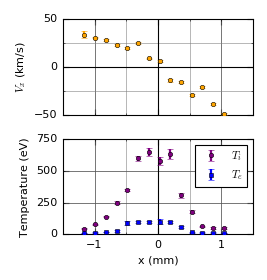

In [39]:
x_mm=x*1e3
x_err=np.zeros_like(x_mm)+0.1
ms=4
lfs=10
tfs=10
elw=2

fig, ax=plt.subplots(2,1,sharex=True,figsize=(3.34,3.5))

#single x error_bar per plot

#ax[0].errorbar(x_mm[0], xerr=x_err[0], y=(V/1e3)[0], yerr=(V_err/1e3)[0], color='orange', fmt='o',markersize=ms,elinewidth=elw)
#ax[1].errorbar(x_mm[0], xerr=x_err[0], y=T_i[0], yerr=T_i_err[0],  color='purple', fmt='o',markersize=ms,elinewidth=elw)
#data points

ax[0].errorbar(x_mm, y=(V/1e3), yerr=(V_err/1e3),  label=r'$V_in$', color='orange', fmt='o',markersize=ms,elinewidth=elw, zorder=5)
ax[1].errorbar(x_mm, y=T_i, yerr=T_i_err, label=r'$T_i$', color='purple', fmt='o',markersize=ms,elinewidth=elw, zorder=5)
ax[1].errorbar(x_mm, y=T_e, yerr=T_e_err,label=r'$T_e$', color='blue', fmt='s',markersize=ms,elinewidth=elw, zorder=5)

ax[0].plot([-2,2],[0,0], lw=1, color='black')
ax[0].plot([0,0],[-50,50], lw=1, color='black')
ax[1].plot([0,0],[0,800], lw=1, color='black')



a=ax[0]
a.set_xlim([-1.5,1.5])
a.set_xticks([-1,0,1])
a.xaxis.set_minor_locator(MultipleLocator(0.5))

a.set_ylim([-50,50])
a.set_yticks([-50,0,50])
a.yaxis.set_minor_locator(MultipleLocator(25))


a.set_ylabel(r'$V_{x}$ (km/s)', fontsize=lfs)
#a.get_yaxis().set_label_coords(-0.17,0.5)
#a.set_xlabel('x (mm)', fontsize=lfs)


a=ax[1]
a.set_ylim([0,750])
a.set_yticks([0,250,500,750])
a.yaxis.set_minor_locator(MultipleLocator(250))

a.set_ylabel(r'Temperature (eV)', fontsize=lfs)
#a.get_yaxis().set_label_coords(-0.17,0.5)

a.legend(fontsize=10, ncol=1,numpoints=1, loc=1)
a.set_xlabel('x (mm)', fontsize=lfs)

for a in ax:
    a.tick_params(labelsize=tfs, pad=5, length=5, width=1)
    a.xaxis.set_minor_locator(MultipleLocator(0.5))
    a.grid(which='major', color='black', linestyle='-')
    a.grid(which='minor', color='gray', linestyle='-')
    a.set_axisbelow(True)


fig.tight_layout()

In [40]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='thomson_profiles.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

# Faraday

In [8]:
%cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15"
B0fn="13-May-2015 16_39_56_1355463638_fliplr.png"
B1fn="13-May-2015 16_39_56_2211629970.png"
S0fn="13-May-2015 17_00_09_1355463638_fliplr.png"
S1fn="13-May-2015 17_00_09_2211629970.png"
s0513_15_pol=PolarimetryMap2(B0fn, B1fn, B0fn, B1fn, S0fn, S1fn)
s=s0513_15_pol

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15


In [9]:
t=pickle.load(open("s0513_16 faraday registration.txt", "rb"))
s.register(transform=t)

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [10]:
s.convert_to_alpha()
s.scale=67
s.set_origin([1255,1682], extent=[-13,13,-6,6])

In [11]:
%cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"
s0513_15_far=FaradayMap2(s0513_15_pol,
                         "s0513_15 IR side on image registration flipud.jpg", 
                         "s0513_15 neL side on.txt", 
                         flip_ne=True)

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


In [12]:
f=s0513_15_far
t=pickle.load(open('s0513_15 interferometry transform.txt', 'rb'))
f.register(transform=t)

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [13]:
f.scale=s.scale
f.set_origin(s.origin, extent=[-13,13,-6,6])

In [14]:
s0513_15_ne=NeLMap2('s0513_15 neL side on.txt', scale=s.scale) 
ne=s0513_15_ne
ne.data=f.I1T
ne.scale=s.scale
ne.set_origin(origin=s.origin, extent=[-13,13,-6,6])

In [15]:
ne.data_c=np.flipud(ne.data_c)
s.data_c=np.flipud(s.data_c)
f.data_c=np.flipud(f.data_c)

In [16]:
b_map=f.data_c.copy()
b_map[b_map>100]=0
b_map[b_map<-100]=0

<IPython.core.display.Javascript object>


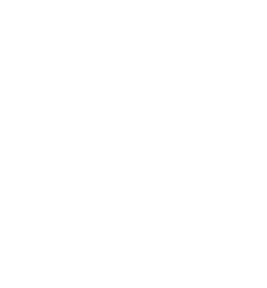

In [17]:
fig, ax=plt.subplots(1,2, figsize=(3.34,3.6), sharex=True, sharey=True)
ne_im=ax[0].imshow(ne.data_c/1e17, extent=s.extent, clim=[0,10], cmap=cmaps.cmaps['inferno'], aspect=1)
mag_im=ax[1].imshow(b_map, extent=f.extent, clim=[-4,4], cmap='seismic')
#f.plot_data_mm(ax=ax[2], clim=[-4,4])

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
ax[0].set_ylabel('z (mm)',fontsize=10, labelpad=-3)
#ax[0].set_title('a) Areal electron density', fontsize=10)
#ax[1].set_title('c) Magnetic Field', fontsize=10)

#set up the colourbar
divider0 = make_axes_locatable(ax[0])
cbar_ax0 = divider0.append_axes("top", size="5%", pad=0.05)
c=cbar_ax0
fig.colorbar(ne_im, cax=c, ticks=[0,5,10],orientation='horizontal')
c.set_xlabel(r'a) $n_e L$ ($\times$10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=4)
c.xaxis.set_label_position('top') 
c.xaxis.tick_top()


divider1 = make_axes_locatable(ax[1])
cbar_ax1 = divider1.append_axes("top", size="5%", pad=0.05)
c=cbar_ax1
fig.colorbar(mag_im, cax=c, ticks=[-4, -2,0,2,4],orientation='horizontal')
c.set_xlabel(r'b) $B$ (T)',fontsize=10, labelpad=4)
c.xaxis.set_label_position('top') 
c.xaxis.tick_top()

plt.subplots_adjust(left=0.1, bottom=0.12, right=0.99, top=0.91,
                wspace=0.0, hspace=0.1)

#colour bars
for c in [cbar_ax0,cbar_ax1]:
    c.tick_params(labelsize=10, pad=0, length=6, width=1)

In [27]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='faraday_maps.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

<IPython.core.display.Javascript object>


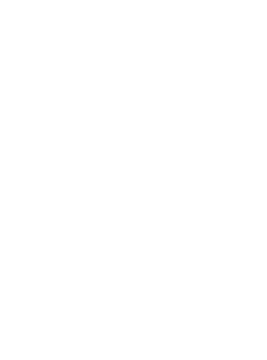

(871, 201) (871, 603)


In [18]:
fig = plt.figure(figsize=(3.34,4.5))

gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,1],
                       height_ratios=[4,1]
                       )

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharey=ax0, sharex=ax0)
ax2 = plt.subplot(gs[2], sharex=ax0)
ax3 = plt.subplot(gs[3], sharex=ax0)

ne_im=ax0.imshow(ne.data_c/1e17, extent=s.extent, clim=[0,10], cmap=cmaps.cmaps['inferno'], aspect=1)
mag_im=ax1.imshow(b_map, extent=f.extent, clim=[-4,4], cmap='seismic')
#f.plot_data_mm(ax=ax[2], clim=[-4,4])

#labels and ticks
for a in ax:
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
ax0.set_ylabel('z (mm)',fontsize=10, labelpad=-3)
#ax[0].set_title('a) Areal electron density', fontsize=10)
#ax[1].set_title('c) Magnetic Field', fontsize=10)
start=(0,-3)
end=(0,3)
width=ne.scale*2

ne.create_lineout(start=start, end=end, lineout_width=width)
ax2.plot(ne.mm, ne.lo/1e18, lw=2)

plt.subplots_adjust(left=0.1, bottom=0.12, right=0.99, top=0.91,
                wspace=0.2, hspace=0.1)

divider0 = make_axes_locatable(ax2)
cbar_ax0 = divider0.append_axes("left", size="5%", pad=0)
c=cbar_ax0
fig.colorbar(ne_im, cax=c, ticks=[0,5,10])
c.set_xlabel(r'$n_e L$ ($\times$10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=4)

divider1 = make_axes_locatable(ax3)
cbar_ax1 = divider1.append_axes("left", size="5%", pad=0.0)
c=cbar_ax1
fig.colorbar(mag_im, cax=c, ticks=[-4, -2,0,2,4])
c.set_xlabel(r'$B$ (T)',fontsize=10, labelpad=4)


#colour bars
for c in [cbar_ax0,cbar_ax1]:
    c.tick_params(labelsize=10, pad=0, length=6, width=1)

# Harris B-field and current

In [21]:
f=s0513_15_far

xx=4.2
zz=0 #note the the data files are flipped ud wrt to the images, so think about the sign here!
lw=2*f.scale

f.create_lineout(start=(zz,-xx), end=(zz, xx), lineout_width=lw)

from lmfit import Model
def Harris(x, x0, B0, delta,C):
    return B0*np.tanh((x-x0)/delta)+C

hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('delta', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(f.lo, x=f.mm)

x=f.mm-res.best_values['x0']
B=f.lo-res.best_values['C']
hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('delta', value = 0.25)
hm.set_param_hint('C', value = 0)
res_0=hm.fit(B, x=x)

def Harris_j(x, x0, B0, delta):
    return B0/(cons.mu_0*delta*(np.cosh((x-x0)/delta))**2)

C=0
x0=0
B0=res_0.best_values['B0']
delta=res_0.best_values['delta']

j=Harris_j(x*1e-3,x0,B0,delta*1e-3)

(871, 120) (871, 683)


<IPython.core.display.Javascript object>


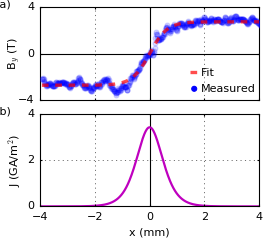

In [22]:
s=s0513_15_pol

fig, ax=plt.subplots(2,1,figsize=(3.34,3), sharex=True)

a=ax[0]

a.plot([-4, 4], [0, 0], color='k', linewidth=1)
a.plot([0, 0], [-4, 4], color='k', linewidth=1)


a.scatter(x,B, color='b', alpha=0.15, zorder=5)
a.plot(x,res_0.best_fit, label='Fit', color='red', lw=3, ls='--', alpha=0.7, zorder=6)
a.scatter([],[], label='Measured', color='b', zorder=5)

legend=a.legend(bbox_to_anchor=(1.03,0.45), 
          frameon=False, 
          fontsize=10,  
          numpoints=1,
          scatterpoints=1,
          handletextpad=0.2, 
          handlelength=0.8)

#legend.get_frame().set_facecolor('#FFFFFF')

a.set_ylim([-4,4])
a.set_yticks([-4,0,4])

a.set_ylabel(r'B$_y$ (T)',fontsize=10)

a=ax[1]
a.plot([0, 0], [0, 6], color='k', linewidth=1)

a.plot(x,j/1e9, lw=2, color='m', label='Electron Density')
a.set_xlabel('x (mm)', fontsize=10)
a.set_ylabel(r'J (GA/m$^2$)', fontsize=10)
a.set_ylim([0,4])
a.set_yticks([0,2,4])

a.set_xlim([-4,4])
a.set_xticks(np.arange(-4,4+1,2))

for a in ax:
    a.tick_params(labelsize=10, pad=5, length=2, width=1)
    a.grid()

ax[0].get_yaxis().set_label_coords(-0.08,0.5)
ax[1].get_yaxis().set_label_coords(-0.08,0.5)

plt.subplots_adjust(left=0.15, bottom=0.14, right=0.97, top=0.97,
                wspace=0.0, hspace=0.15)

ax[0].text(x=-0.2, y=1.08, va='top',ha='left',s=r' a)', fontsize=10,transform=ax[0].transAxes)
ax[1].text(x=-0.2, y=1.08, va='top',ha='left',s=r' b)', fontsize=10,transform=ax[1].transAxes)

In [173]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='harris.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

In [27]:
data=list(zip(x, B))
headings=('x (mm)', 'B_y (T)')
filename=s.fn+' B_y lineout'
with open(filename+'.dat', 'w',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(headings)
    for f in data:
        writer.writerow(f)

In [25]:
data

[(-3.9339797322721517, -2.737812290758908),
 (-3.919027848705968, -2.7378111361203188),
 (-3.9040759651397843, -2.7378099260602347),
 (-3.8891240815736015, -2.7378086579185057),
 (-3.8741721980074186, -2.7378073289073015),
 (-3.8592203144412349, -2.7378059361049822),
 (-3.8442684308750512, -2.7378044764496781),
 (-3.8293165473088684, -2.7378029467325571),
 (-3.8143646637426856, -2.737801343590772),
 (-3.7994127801765019, -2.7377996635000708),
 (-3.7844608966103181, -2.7377979027670456),
 (-3.7695090130441353, -2.7377960575210185),
 (-3.7545571294779525, -2.7377941237055317),
 (-3.7396052459117688, -2.7377920970694301),
 (-3.7246533623455851, -2.7377899731575197),
 (-3.7097014787794023, -2.7377877473007741),
 (-3.694749595213219, -2.7377854146060705),
 (-3.6797977116470353, -2.7377829699454357),
 (-3.664845828080852, -2.7377804079447778),
 (-3.6498939445146692, -2.7377777229720701),
 (-3.6349420609484859, -2.7377749091249739),
 (-3.6199901773823022, -2.7377719602178678),
 (-3.6050382938

# Bdots

In [2]:
cd "~\Google Drive\MAGPIE\data\2016\s0129_16 RECONNECTION 12 fr + Bdots +Fday cup\s0129_16 12 Frame"

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0129_16 RECONNECTION 12 fr + Bdots +Fday cup\s0129_16 12 Frame


In [3]:
s=OpticalFrames(145,15)
s.logarithm()
s.s_nl[9]=s.s_nl[9]*0.8
s.rotate(-90+25.4)
s.crop((575,550), xcrop=230, ycrop=350)

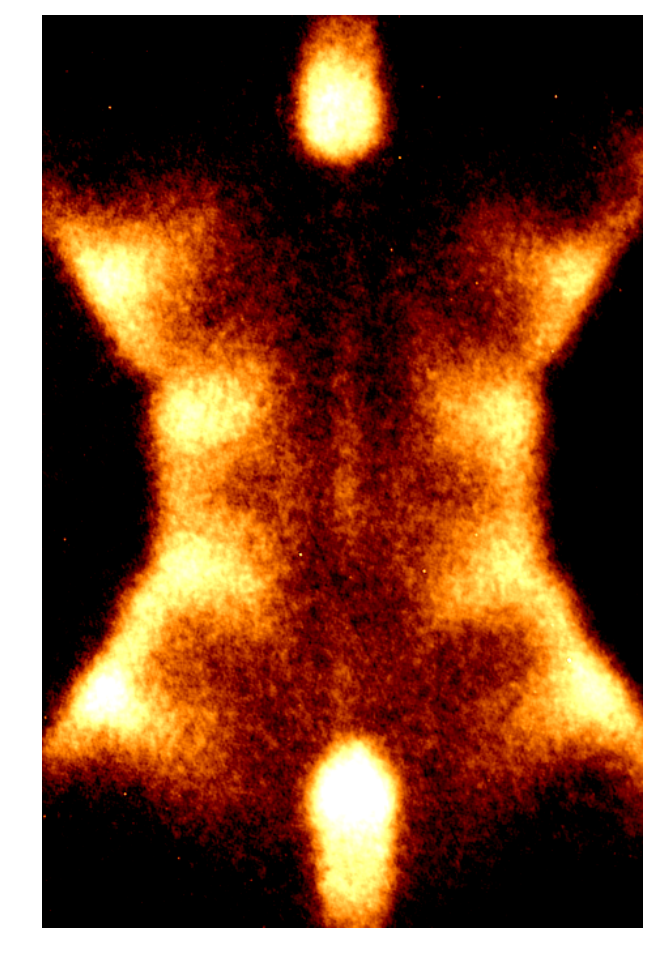

In [193]:
%matplotlib inline
s.save_gif('s0129_16 pop', clim=[0.2,0.8])

In [4]:
#T12 and T34 in reconnection flow, C12 in the divergent outflow
shot="s0129_16"
pairs={"C12":"A", "T12":"C", "T34":"D",}
attenuations={"A1":10.8,"A2":9.7, "C1":10, "C2":10, "D1":10, "D2":10}
diameters={"C12":2.0, "T12":0.5, "T34":0.5} #diameter in mm
b=Bdots(shot=shot, pairs=pairs, attenuations=attenuations, diameters=diameters, threshold=0.7, window=3000, fix_start=1750)

<IPython.core.display.Javascript object>


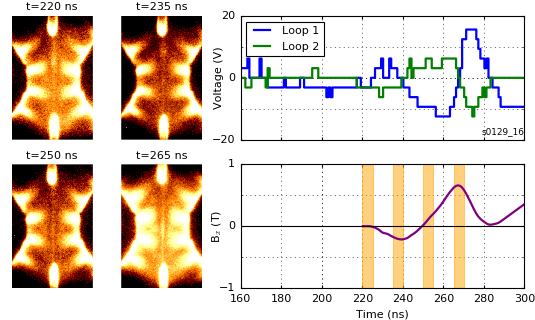

In [5]:
import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=(6.69,4))


gs1 = gridspec.GridSpec(2, 2,)
gs1.update(left=0.0, right=0.4, wspace=0.05, top=0.95)

gs2 = gridspec.GridSpec(2, 1,)
gs2.update(left=0.45, right=0.98, top=0.95)



ax1 = plt.subplot(gs1[0])
ax2 = plt.subplot(gs1[1])
ax3 = plt.subplot(gs1[2])
ax4 = plt.subplot(gs1[3])
ax5 = plt.subplot(gs2[0])
ax6 = plt.subplot(gs2[1])




frames=[5,6,7,8]
for fin, a in zip(frames, [ax1,ax2,ax3,ax4]):
    a.imshow(s.s_c[fin], cmap='afmhot', clim=[0.2,0.8], interpolation='none')
    a.axis('off')
    a.set_title('t='+str(s.frame_times[fin])+' ns', fontsize=10)

#bdots

pair="T12"
ts=1530

a=ax5
#10* voltage accounts for attenuatore
a.step(b.bd[pair].bd1.time-ts, 10*b.bd[pair].bd1.data, lw=2, label="Loop 1")
a.step(b.bd[pair].bd1.time-ts, 10*b.bd[pair].bd2.data, lw=2, label="Loop 2")
    
a.set_ylim([-20,20])
a.set_yticks([-20,0,20])

a.set_ylabel(r'Voltage (V)', fontsize=10, labelpad=30)

a.yaxis.set_minor_locator(MultipleLocator(10))
a.legend(fontsize=10, loc=2)


a=ax6

a.plot(b.bd[pair].time_B-ts, -b.bd[pair].B, lw=2, label="Magnetic Field", c='purple')
a.plot([0,1000], [0,0], lw=1, c='black')
    
a.set_xlim([0,500])
a.set_ylim([-1,1])
a.set_yticks([-1,0,1])

a.set_ylabel(r'B$_x$ (T)', fontsize=10)
#a.set_title('Integrated Magnetic Field', fontsize=10)

a.yaxis.set_minor_locator(MultipleLocator(0.5))
a.xaxis.set_minor_locator(MultipleLocator(100))


a.set_xlabel('Time (ns)', fontsize=10)

for a in [ax5,ax6]:
    a.set_xlim([160,300])
    a.yaxis.set_label_coords(-0.06, 0.5)
    a.grid(which='major')
    a.grid(which='minor')
    a.set_axisbelow(True)
    a.tick_params(labelsize=10, pad=5, length=3, width=1)

ax5.text(s='s0129_16', ha='right', va='bottom',x=300, y=-19, fontsize=8)

plt.setp(ax5.get_xticklabels(), visible=False)


import matplotlib.patches as patches

for t in s.frame_times[frames]:
    ax6.add_patch(
        patches.Rectangle(
            (t, -1),   # (x,y)
            5,          # width
            2,          # height
            alpha=0.5,
            color='orange'
        )
    )
        

In [6]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='bdots.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

In [31]:
bp=-b.bd[pair].B[:63]
tp=b.bd[pair].time_B[:63]-ts-220
Vy=130e3
y=tp*1e-9*Vy
j=1/(4e-9*np.pi)*np.gradient(bp, y[1]-y[0])

<IPython.core.display.Javascript object>


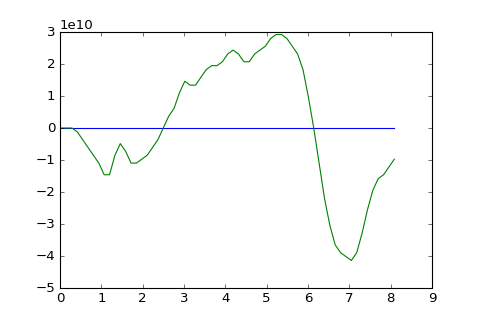

In [52]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(y*1e3,bp)
ax.plot(y*1e3,j)

# Power Balance

In [159]:
import scipy.constants as c
#Energies in J/m^3
m_i=12*c.m_n
B=N(3,0.3)
V_in=N(50e3,5e3)
n_e=N(3e17, 0.6e17)*1e6#m^3
Z=4
n_i=n_e/Z
T_e=N(15,3)*11604#K
T_i=N(50,5)*11604#K

E_kin_in=0.5*m_i*n_i*V_in**2
E_mag_in=B**2/(2*c.mu_0)
E_thi_in=1.5*c.k*n_i*T_i
E_the_in=1.5*c.k*n_e*T_e

L=N(7e-3,1e-3)

V_out=N(130e3,5e3)
n_e=N(6e17, 0.6e17)*1e6#m^3
B=0
Z=6
n_i=n_e/Z
T_e=N(100,10)*11604#K
T_i=N(600,60)*11604#K

E_kin_out=0.5*m_i*n_i*V_out**2
E_thi_out=1.5*c.k*n_i*T_i
E_the_out=1.5*c.k*n_e*T_e

d=N(0.6e-3, 0.1e-3)

E_in=np.array([E_mag_in, E_kin_in, E_thi_in, E_the_in])
E_out=np.array([0,E_kin_out, E_thi_out, E_the_out])

rate_in=L*V_in*16e-3
rate_out=d*V_out*16e-3

P_in=E_in*rate_in
P_out=E_out*rate_out

data=np.array([[pin.mean,pout.mean] for pin,pout in zip(P_in,P_out)])
std=np.array([[pin.std,pout.std] for pin,pout in zip(P_in,P_out)])

#data = np.array([1e-6*rate_in*E_in,1e-6*rate_out*E_out])
colors = ('red', 'orange', 'purple', '#3333FF')
labels=[r'$P_{mag}$', '$P_{kin}$',r'$P_{th, i}$',r'$P_{th,e}$']

In [34]:
fig, ax=plt.subplots(figsize=(3.34,3))

ekw={'ecolor':'black', 'elinewidth':1, 'capsize':4, 'capthick':1}

width=0.1
ind=np.array([0,0.5])

ax.bar([0], data[0,0]/1e6,width,yerr=std[0,0]/1e6,color=colors[0], label=labels[0], error_kw=ekw)

for i in range(1,4):
    ax.bar(ind+i*width, data[i]/1e6,width,yerr=std[i]/1e6,color=colors[i], label=labels[i], error_kw=ekw)

ax.set_xticks([0.2,0.7])
ax.set_xticklabels(['Power in','Power out'])
ax.set_xlim(0,0.9)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylim([0,30])
ax.set_ylabel('Power (MW)', fontsize=10)
ax.tick_params(labelsize=10, pad=5, length=5, width=1)


ax.legend(loc=(-0.01,0.88), 
          ncol=4, 
          fontsize=12, 
          frameon=False, 
          columnspacing=0.8,
          numpoints=1, 
          handletextpad=0.5, 
          handlelength=1)

plt.subplots_adjust(left=0.16, bottom=0.10, right=0.99, top=0.97,
                wspace=0.0, hspace=0.1)


#ax.set_title('Power Balance in the Reconnection Layer', fontsize=12)

<IPython.core.display.Javascript object>

In [35]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='power_balance.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

# Electric Field

In [160]:
%cd "~\Google Drive\MAGPIE\data\2015\s0611_15"
import csv
x_pos=[]
n_e=[]
Z=[]
T_e=[]
T_e_err=[]
T_i=[]
T_i_err=[]
V=[]
V_err=[]

filename='s0611_15 TS fits v3.dat'
with open(filename, 'r') as fn:
    reader = csv.reader(fn, delimiter='\t')
    next(reader)
    for row in reader:
        x_pos.append(float(row[3]))
        n_e.append(float(row[5]))
        Z.append(float(row[6]))
        T_e.append(float(row[7]))
        tee=float(row[8])
        if tee==0:
            T_e_err.append(float(row[7])/10.0)
        else:
            T_e_err.append(tee)
        T_i.append(float(row[9]))
        tie=float(row[10])
        if tie==0:
            T_i_err.append(float(row[9])/10.0)
        else:
            T_i_err.append(tie)
        V.append(float(row[11]))
        ve=float(row[12])
        if tie==0:
            V_err.append(float(row[11])/10.0)
        else:
            V_err.append(ve)
        
x_ts=np.array(x_pos)
n_e=np.array(n_e)*1e6
n_e_err=(np.zeros_like(n_e)+0.3e17)*1e6 
Z=np.array(Z)
T_e=np.array(T_e)
T_e[11]=15 #set to avg.
T_e_err=np.array(T_e_err)
T_i=np.array(T_i)
T_i_err=np.array(T_i_err)
V=np.array(V)*1e3
V_err=np.array(V_err)*1e3 

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0611_15


In [162]:
f=s0513_15_far

xx=4.2
zz=0 #note the the data files are flipped ud wrt to the images, so think about the sign here!
lw=2*f.scale

f.create_lineout(start=(zz,-xx), end=(zz, xx), lineout_width=lw)

from lmfit import Model
def Harris(x, x0, B0, delta,C):
    return B0*np.tanh((x-x0)/delta)+C

hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('delta', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(f.lo, x=f.mm)

(871, 120) (871, 683)


In [163]:
x=f.mm-res.best_values['x0']
B=f.lo-res.best_values['C']
hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('delta', value = 0.25)
hm.set_param_hint('C', value = 0)
res_0=hm.fit(B, x=x)

In [164]:
import scipy.constants as c
def Harris_j(x, x0, B0, delta):
    return B0/(c.mu_0*delta*(np.cosh((x-x0)/delta))**2)

C=0
x0=0
B0=res_0.best_values['B0']
delta=res_0.best_values['delta']

j=Harris_j(x*1e-3,x0,B0,delta*1e-3)

In [165]:
E0=50e3*B0
B_ohm=Harris(x_ts,x0,B0,delta,C)
J_ohm=Harris_j(x_ts*1e-3,x0,B0,delta*1e-3)

In [181]:
def uv_m_std(uv):
    uv_mean=np.array([u.mean for u in uv])
    uv_std=np.array([u.std for u in uv])
    return uv_mean, uv_std


N_uv=lambda q, q_err: np.array([N(qq, qe) for qq, qe in zip(q, q_err)])

T_e_err[3]=7
T_e_uv=N_uv(T_e,T_e_err)

In [182]:
def col_log_eis(T_e,n_e,Z):
    if T_e<10*Z**2: #see NRL formulary pg 34
        col_log=23-np.log((n_e*1e-6)**0.5*Z*T_e**-1.5)
    else:
        col_log=24-np.log((n_e*1e-6)**0.5*T_e**-1.0)
    return col_log
col_log_ei=np.vectorize(col_log_eis)

eta=1.03e-2*Z*col_log_ei(T_e,n_e,Z)*T_e_uv**-1.5 #ohm cm
eta=eta*1e-2#ohm m
etaJ=eta*J_ohm/1e3
etaJ_mean,etaJ_std=uv_m_std(etaJ)

<IPython.core.display.Javascript object>


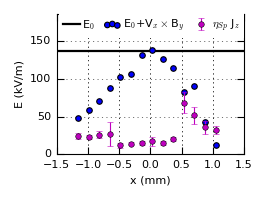

In [183]:
fig, ax=plt.subplots(figsize=(3.34,2.5))

ax.plot([-2,2], [E0/1e3, E0/1e3], c='k', label=r'E$_0$', lw=2,)
ax.scatter(x_ts, (E0+V*B_ohm)/1e3, s=25, label=r'E$_0$+V$_x\times$B$_y$', c='blue',zorder=6)
ax.errorbar(x_ts, etaJ_mean, yerr=etaJ_std,label=r'$\eta_{Sp}$ J$_z$', c='m',fmt='o', ms=5, zorder=7)

leg=ax.legend(loc=(0.01,0.83), 
          ncol=3, 
          fontsize=10, 
          columnspacing=0.8,
          numpoints=1, 
          handletextpad=0.2, 
          handlelength=1.5)

leg.get_frame().set_linewidth(0.0)


a=ax
a.tick_params(labelsize=10, pad=5, length=6, width=1)
a.grid(True)
a.set_xlabel("x (mm)", fontsize=10)
a.set_xlim([-1.5,1.5])
a.set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5])
a.xaxis.set_minor_locator(MultipleLocator(0.5))
a.grid(which='minor')

a.set_ylim([0,185])
a.set_yticks([0,50,100,150])
a.set_ylabel(r'E (kV/m)', fontsize=10)
a.set_axisbelow(True)


fig.subplots_adjust(left=0.16, bottom=0.16, right=0.96, top=0.99,
                wspace=0.3, hspace=0.1)
fig.tight_layout()
#fig.suptitle(r"Resistive Ohm's Law across the current sheet ", fontsize=12, x=0.55)



In [184]:
th_folder=r'~\Google Drive\MAGPIE\papers\PoP2017'
fn='electric_field.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

# Current

In [187]:
j=Harris_j(x*1e-3,x0,B0,delta*1e-3)

In [ ]:
I=